# Exploratory Data Analysis in Python

---

## Chapter 1: Read, Clean and Validate

### Importing Libraries

In [18]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import scipy.interpolate
import statsmodels.formula.api as smf

### Loading Datasets

In [20]:
# Importing course datasets as DataFrames
brfss = pd.read_hdf('D:/git_repositories/Datacamp-Exploratory-Data-Analysis-in-Python/Data/brfss.hdf5', 'brfss') # Behavioral Risk Factor Surveillance System (BRFSS) 
gss = pd.read_hdf('D:/git_repositories/Datacamp-Exploratory-Data-Analysis-in-Python/Data/gss.hdf5', 'gss') # General Social Survey (GSS) 
nsfg = pd.read_hdf('D:/git_repositories/Datacamp-Exploratory-Data-Analysis-in-Python/Data/nsfg.hdf5', 'nsfg') # National Survey of Family Growth (NSFG) 

---

#### Exploring the NSFG Data

In [5]:
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [6]:
# Display the number of rows and columns
nsfg.shape

(9358, 10)

In [7]:
# Display the names of the columns
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [8]:
# Select column birthwgt_oz1: ounces
ounces = nsfg.birthwgt_oz1

---

#### Clean a Variable

**In the 'nbrnaliv' column, replace the value 8, in place, with the special value NaN**

In [9]:
nsfg['nbrnaliv'].value_counts()

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64

In [10]:
# Replacing value 8 with special value NaN in 'nbrnaliv' column
nsfg['nbrnaliv'].replace([8], np.nan, inplace = True)

In [11]:
# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


---

#### Compute a Variable

**Select 'agecon' and 'agepreg', divide them by 100, and assign them to the local variables agecon and agepreg.**

In [12]:
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

In [14]:
print(agecon.head())

0    20.00
1    22.91
2    32.41
3    36.50
4    21.91
Name: agecon, dtype: float64


In [13]:
# Compute the difference
preg_length = agepreg - agecon

In [15]:
# Compute summary statistics
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


---

#### Make a Histogram

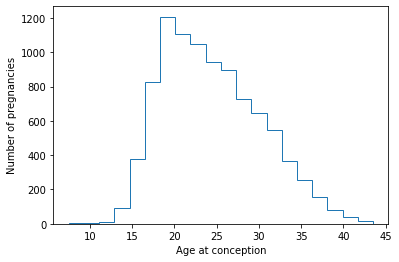

In [16]:
# Plot the histogram
plt.hist(agecon, bins=20, histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

---